# Generating synthetic datasets

This notebook demonstrates how to use `detrend1d` to generate synthetic datasets with an arbitrary datum and trend.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import detrend1d as dtr

## TimeSeries with temporal trend

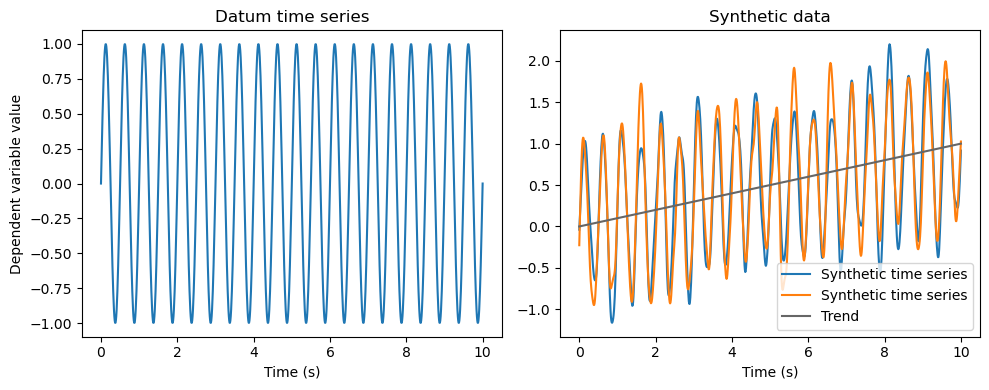

In [2]:
t       = np.linspace(0, 10, 1001)                  # time
y       = np.sin( np.linspace(0, 40*np.pi, 1001) )  # dependent variable (DV) value over time
datum   = dtr.Datum(t, y)                           # TimeSeries object to which trend will be applied
trend   = dtr.trends.inter.Linear( slope=0.1, intercept=0 )            # inter-cycle linear trend
rng     = dtr.random.GaussianRandomFieldGenerator(fwhm=10, amp=0.2)    # smooth temporal noise
gen     = dtr.random.TimeSeriesGenerator(datum, trend, rng)            # random TimeSeries generator

np.random.seed(0)
ts0     = gen.generate()   # random TimeSeries object
ts1     = gen.generate()   # another random TimeSeries object

fig,axs = plt.subplots(1, 2, figsize=(10,4), tight_layout=True)
ax0,ax1 = axs
datum.plot( ax=ax0 )
ts0.plot( ax=ax1, label='Synthetic time series' )
ts1.plot( ax=ax1, label='Synthetic time series' )
trend.plot( ax=ax1, t0=0, t1=10, color='0.4', label='Trend' )
ax1.legend()
[ax.set_xlabel('Time (s)')  for ax in axs]
ax0.set_ylabel('Dependent variable value')
[ax.set_title(s)  for ax,s in zip(axs, ['Datum time series', 'Synthetic data'])]
plt.show()

## CyclicalTimeSeries with intra-cycle temporal trend

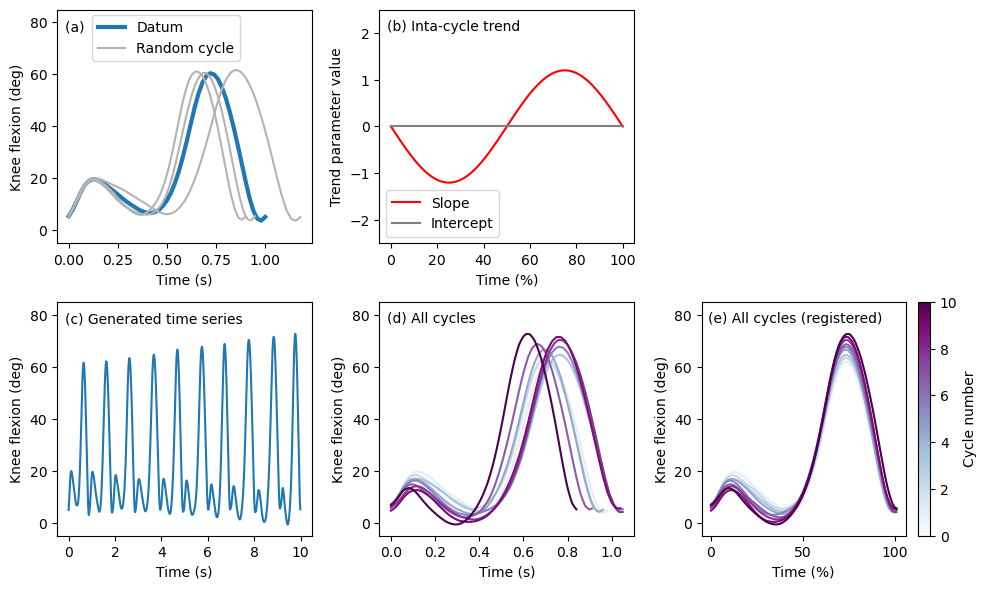

In [3]:

# create time series model:
datum   = dtr.datum.Schwartz2008WalkingKneeFlexionDatum()            # experimental knee flexion datum from Schwartz (2008)
rng     = dtr.random.GaussianRandomFieldGenerator(fwhm=5, amp=0.5)   # smooth temporal noise
cd      = dtr.random.DurationModel(1.0, 0.1)                         # cycle duration noise
slope   = -1.2 * np.sin( np.linspace(0, 2*np.pi, 101) )              # intra-cycle slope
trend   = dtr.trends.intra.Linear( slope=slope, intercept=np.zeros( slope.size ) )  # intra-cycle trend
gen     = dtr.random.CyclicalTimeSeriesGenerator(datum=datum, trend=trend, rng=rng, cd=cd)


# generate random cycles to qualitatively check inter-cycle variance:
np.random.seed(3)
ts0     = gen.generate_single_cycle()
ts1     = gen.generate_single_cycle()
ts2     = gen.generate_single_cycle()


# generate a full CyclicalTimeSeries:
np.random.seed(123)
cts     = gen.generate(durn=10, hz=100)    # CyclicalTimeSeries object



# plot:
fig,axs = plt.subplots(2, 3, figsize=(10,6), tight_layout=True)
axs[0,2].set_visible(False)
axs     = list(axs.ravel())
axs.pop(2)


# plot datum and random cycles:
ax      = axs[0]
datum.plot( ax=ax, lw=3, label='Datum' )
for ts in [ts0,ts1,ts2]:
    label = 'Random cycle' if ts==ts0 else None
    ts.plot( ax=ax, color='0.7', label=label )
ax.legend(loc='lower left', bbox_to_anchor=(0.11, 0.75))


# plot the intra-cycle trend:
axs[1].plot( trend.slope, color='r', label='Slope' )
axs[1].plot( trend.intercept, color='0.5', label='Intercept' )
axs[1].legend( loc='lower left' )


# plot the full cyclical time series:
cts.plot( ax=axs[2] )


# plot individual cycles:
cts.plot_cycles(ax=axs[3], registered_n=None, cmap=plt.cm.BuPu)
cts.plot_cycles(ax=axs[4], registered_n=101, cmap=plt.cm.BuPu, colorbar=True)


# add panel labels, xlabels and ylabels:
plabels = '', 'Inta-cycle trend', 'Generated time series', 'All cycles', 'All cycles (registered)'
xlabels = ['Time (s)', 'Time (%)', 'Time (s)', 'Time (s)', 'Time (%)']
ylabels = ['Knee flexion (deg)', 'Trend parameter value'] + ['Knee flexion (deg)']*3
[ax.text(0.03, 0.91, f'({chr(97+i)}) {s}', transform=ax.transAxes)   for i,(ax,s) in enumerate(zip(axs, plabels))]
[ax.set_xlabel(s)  for ax,s in zip(axs, xlabels)]
[ax.set_ylabel(s)  for ax,s in zip(axs, ylabels)]
[ax.set_ylim(-5,85)  for ax in axs if ax!=axs[1] ]; axs[1].set_ylim(-2.5,2.5)


plt.show()



## CyclicalTimeSeries with inter-cycle null signal

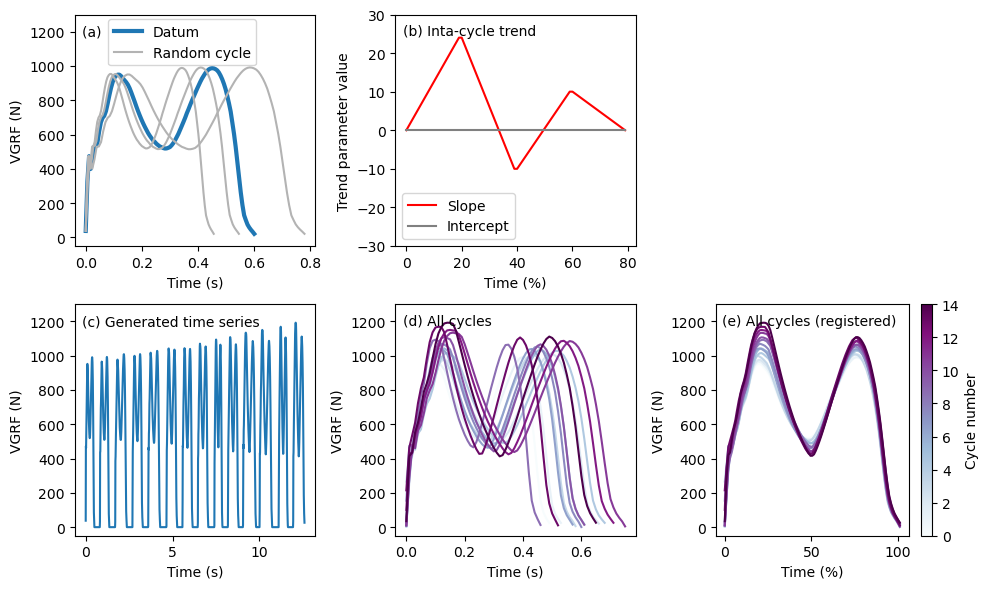

In [4]:
# create time series model:
datum   = dtr.datum.Pataky2008WalkingVerticalGroundReactionForceDatum()  # VGRF datum from Pataky et al. (2008)
rng     = dtr.random.GaussianRandomFieldGenerator(fwhm=40, amp=5, taper=0.10)
cd      = dtr.random.DurationModel(0.6, 0.1)
icd     = dtr.random.DurationModel(0.3, 0.05)
slope   = 20 * np.hstack( [  np.linspace(0, 1.2, 20), np.linspace(1.2, -0.5, 20), np.linspace(-0.5, 0.5, 20), np.linspace(0.5, 0, 20)  ] )
trend   = dtr.trends.intra.Linear( slope=slope, intercept=np.zeros( slope.size ) )
gen     = dtr.random.CyclicalTimeSeriesGenerator(datum=datum, trend=trend, rng=rng, cd=cd, icd=icd)


# generate a few random cycles to qualitatively check inter-cycle variance:
np.random.seed(3)
ts0     = gen.generate_single_cycle()
ts1     = gen.generate_single_cycle()
ts2     = gen.generate_single_cycle()


# generate a full time series:
np.random.seed(123)
cts     = gen.generate(durn=12, hz=100, crop=False)


# plot:
fig,axs = plt.subplots(2, 3, figsize=(10,6), tight_layout=True)
axs[0,2].set_visible(False)
axs     = list(axs.ravel())
axs.pop(2)


# plot datum and random cycles:
ax      = axs[0]
datum.plot( ax=ax, lw=3, label='Datum' )
for ts in [ts0,ts1,ts2]:
    label = 'Random cycle' if ts==ts0 else None
    ts.plot( ax=ax, color='0.7', label=label )
ax.legend(loc='lower left', bbox_to_anchor=(0.11, 0.75))


# plot the intra-cycle trend:
axs[1].plot( trend.slope, color='r', label='Slope' )
axs[1].plot( trend.intercept, color='0.5', label='Intercept' )
axs[1].legend( loc='lower left' )


# plot the full cyclical time series:
cts.plot( ax=axs[2] )


# plot individual cycles:
cts.plot_cycles(ax=axs[3], registered_n=None, cmap=plt.cm.BuPu)
cts.plot_cycles(ax=axs[4], registered_n=101, cmap=plt.cm.BuPu, colorbar=True)


# add panel labels, xlabels and ylabels:
plabels = '', 'Inta-cycle trend', 'Generated time series', 'All cycles', 'All cycles (registered)'
xlabels = ['Time (s)', 'Time (%)', 'Time (s)', 'Time (s)', 'Time (%)']
ylabels = ['VGRF (N)', 'Trend parameter value', 'VGRF (N)', 'VGRF (N)', 'VGRF (N)']
[ax.text(0.03, 0.91, f'({chr(97+i)}) {s}', transform=ax.transAxes)   for i,(ax,s) in enumerate(zip(axs, plabels))]
[ax.set_xlabel(s)  for ax,s in zip(axs, xlabels)]
[ax.set_ylabel(s)  for ax,s in zip(axs, ylabels)]
[ax.set_ylim(-50,1300)  for ax in axs if ax!=axs[1] ]; axs[1].set_ylim(-30,30)


plt.show()


## CyclicalTimeSeries with compound trend (both inter- and intra-cycle trends)

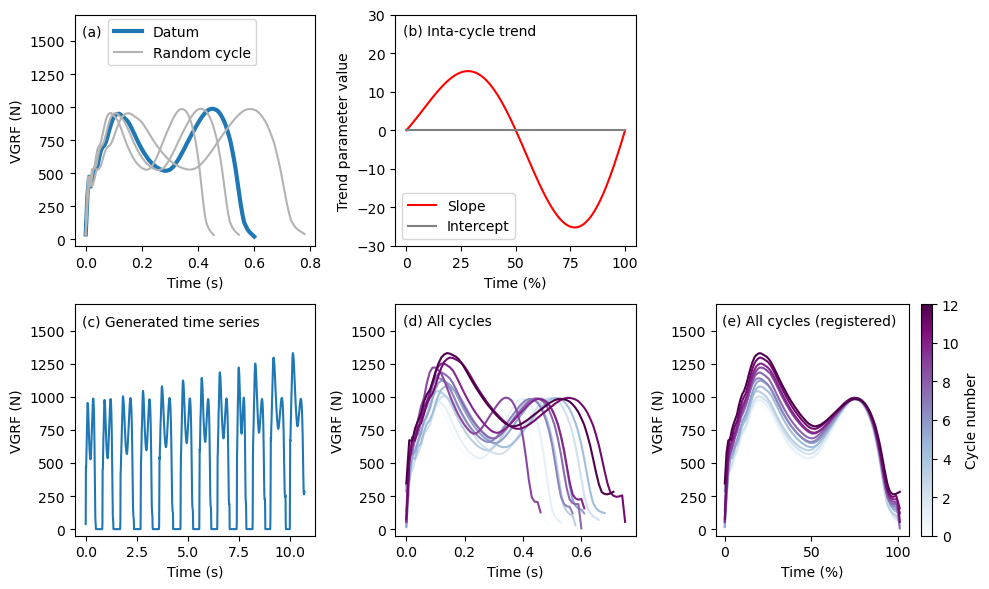

In [5]:
# create time series model:
datum   = dtr.datum.Pataky2008WalkingVerticalGroundReactionForceDatum()
rng     = dtr.random.GaussianRandomFieldGenerator(fwhm=40, amp=5, taper=0.10)
cd      = dtr.random.DurationModel(0.6, 0.1)
icd     = dtr.random.DurationModel(0.3, 0.05)
slope   = 20 * np.sin( np.linspace(0, 2*np.pi, 101) ) * np.linspace(0.5, 1.5, 101)
trend0  = dtr.trends.inter.Linear( slope=25, intercept=0 )
trend1  = dtr.trends.intra.Linear( slope=slope, intercept=np.zeros( slope.size ) )
trend   = dtr.trends.Compound(inter=trend0, intra=trend1)
gen     = dtr.random.CyclicalTimeSeriesGenerator(datum=datum, trend=trend, rng=rng, cd=cd, icd=icd)


# generate a few random cycles (to qualitatively check between-cycle variance):
np.random.seed(3)
ts0     = gen.generate_single_cycle()
ts1     = gen.generate_single_cycle()
ts2     = gen.generate_single_cycle()


# generate a full time series:
np.random.seed(123)
cts     = gen.generate(durn=10, hz=100, crop=False)



# plot:
fig,axs = plt.subplots(2, 3, figsize=(10,6), tight_layout=True)
axs[0,2].set_visible(False)
axs     = list(axs.ravel())
axs.pop(2)


# # plot datum and random cycles:
ax      = axs[0]
datum.plot( ax=ax, lw=3, label='Datum' )
for ts in [ts0,ts1,ts2]:
    label = 'Random cycle' if ts==ts0 else None
    ts.plot( ax=ax, color='0.7', label=label )
ax.legend(loc='lower left', bbox_to_anchor=(0.11, 0.75))


# plot the intra-cycle trend:
axs[1].plot( trend1.slope, color='r', label='Slope' )
axs[1].plot( trend1.intercept, color='0.5', label='Intercept' )
axs[1].legend( loc='lower left' )


# plot the full cyclical time series:
cts.plot( ax=axs[2] )


# plot individual cycles:
cts.plot_cycles(ax=axs[3], registered_n=None, cmap=plt.cm.BuPu)
cts.plot_cycles(ax=axs[4], registered_n=101, cmap=plt.cm.BuPu, colorbar=True)


# add panel labels, xlabels and ylabels:
plabels = '', 'Inta-cycle trend', 'Generated time series', 'All cycles', 'All cycles (registered)'
xlabels = ['Time (s)', 'Time (%)', 'Time (s)', 'Time (s)', 'Time (%)']
ylabels = ['VGRF (N)', 'Trend parameter value', 'VGRF (N)', 'VGRF (N)', 'VGRF (N)']
[ax.text(0.03, 0.91, f'({chr(97+i)}) {s}', transform=ax.transAxes)   for i,(ax,s) in enumerate(zip(axs, plabels))]
[ax.set_xlabel(s)  for ax,s in zip(axs, xlabels)]
[ax.set_ylabel(s)  for ax,s in zip(axs, ylabels)]
[ax.set_ylim(-50,1700)  for ax in axs if ax!=axs[1] ]; axs[1].set_ylim(-30,30)


plt.show()